In [49]:
!pip install pandas
import pandas as pd
df=pd.read_csv("imtihon.csv")
!pip install numpy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns


In [50]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [51]:
df['Gender'].fillna("Not Provided",inplace=True)
df["Married"].fillna(np.random.choice(["Yes","No"]),inplace=True) # one hot ga qoy gender
df["Dependents"].fillna(np.random.choice(["Yes","No"]),inplace=True)
df["Credit_History"].fillna(np.random.choice([0,1]),inplace=True)
df["Loan_Amount_Term"].fillna(method='ffill',inplace=True)

<ipython-input-51-3c4b2821f9bc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna("Not Provided",inplace=True)
<ipython-input-51-3c4b2821f9bc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [52]:
df["Self_Employed"].fillna(np.random.choice(["Yes","No"]),inplace=True)

<ipython-input-52-918b1ab7289e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Self_Employed"].fillna(np.random.choice(["Yes","No"]),inplace=True)


In [53]:
df["LoanAmount"].fillna(df["LoanAmount"].mean(),inplace=True)

<ipython-input-53-898b78da8edb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["LoanAmount"].fillna(df["LoanAmount"].mean(),inplace=True)


In [54]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [56]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Married'] = label_encoder.fit_transform(df['Married'])
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Self_Employed'] = label_encoder.fit_transform(df['Self_Employed'])
df['Loan_Status'] = label_encoder.fit_transform(df['Loan_Status'])
df['Property_Area'] = label_encoder.fit_transform(df['Property_Area'])

In [85]:
one_hot_encoded = pd.get_dummies(df['Gender'], prefix='Gender')
df = pd.concat([df, one_hot_encoded], axis=1)

print(df[['Male', 'Female']])


KeyError: "None of [Index(['Male', 'Female'], dtype='object')] are in the [columns]"

In [69]:
df['Dependents'] = df['Dependents'].str.replace('+', '')

In [76]:
df['Dependents'] = pd.to_numeric(df['Dependents'], errors='coerce')

# Now, you can convert to float safely
df['Dependents'] = df['Dependents'].astype(float)

Q1: 2877.5, Q3: 5795.0, IQR: 2917.5


Text(0.5, 1.0, 'ApplicantIncome - Boxplot')

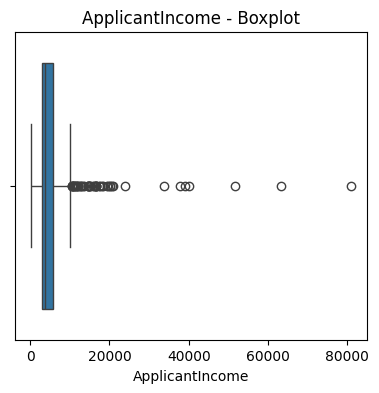

In [80]:
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['ApplicantIncome'] < lower_bound) | (df['ApplicantIncome'] > upper_bound)]['ApplicantIncome']
# 1. Vizual analiz: Boxplot orqali outlierlarni ko'rish
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['ApplicantIncome'])
plt.title('ApplicantIncome - Boxplot')

Q1: 2877.5, Q3: 5795.0, IQR: 2917.5
Tozalangan data shakli: (564, 13)


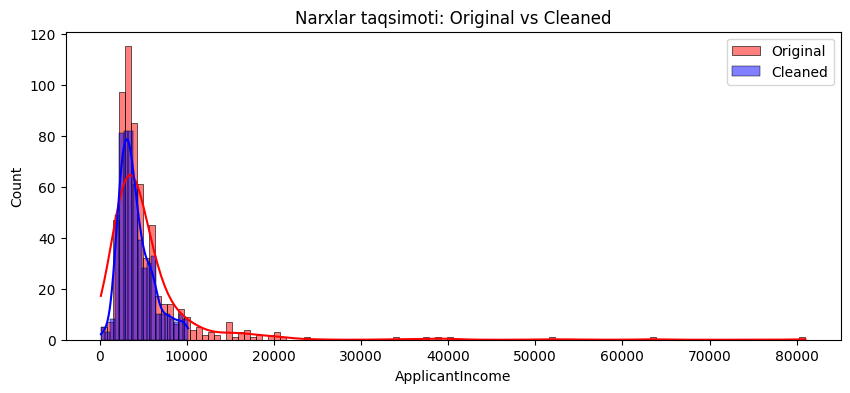

In [61]:

# 3. Outlierlarni tozalash
df_cleaned = df[(df['ApplicantIncome'] >= lower_bound) & (df['ApplicantIncome'] <= upper_bound)]
print(f"Tozalangan data shakli: {df_cleaned.shape}")

# 4. Qiyoslash
plt.figure(figsize=(10, 4))
sns.histplot(df['ApplicantIncome'], color='red', label='Original', kde=True)
sns.histplot(df_cleaned['ApplicantIncome'], color='blue', label='Cleaned', kde=True)
plt.legend()
plt.title("Narxlar taqsimoti: Original vs Cleaned")
plt.show()


Q1: 0.0, Q3: 2297.25, IQR: 2297.25


Text(0.5, 1.0, 'CoapplicantIncome - Boxplot')

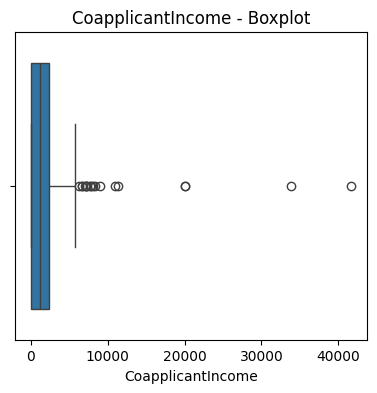

In [81]:
Q1 = df['CoapplicantIncome'].quantile(0.25)
Q3 = df['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['CoapplicantIncome'] < lower_bound) | (df['CoapplicantIncome'] > upper_bound)]['CoapplicantIncome']

# 1. Vizual analiz: Boxplot orqali outlierlarni ko'rish
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['CoapplicantIncome'])
plt.title('CoapplicantIncome - Boxplot')


Q1: 0.0, Q3: 2297.25, IQR: 2297.25
Tozalangan data shakli: (596, 13)


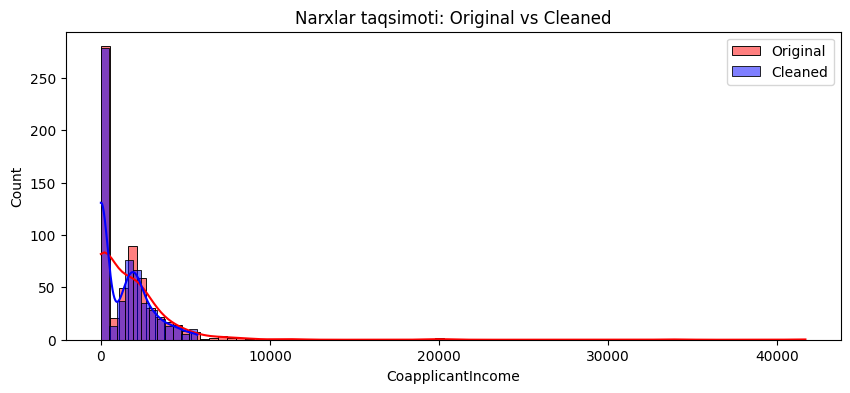

In [62]:

# 3. Outlierlarni tozalash
df_cleaned = df[(df['CoapplicantIncome'] >= lower_bound) & (df['CoapplicantIncome'] <= upper_bound)]
print(f"Tozalangan data shakli: {df_cleaned.shape}")

# 4. Qiyoslash
plt.figure(figsize=(10, 4))
sns.histplot(df['CoapplicantIncome'], color='red', label='Original', kde=True)
sns.histplot(df_cleaned['CoapplicantIncome'], color='blue', label='Cleaned', kde=True)
plt.legend()
plt.title("Narxlar taqsimoti: Original vs Cleaned")
plt.show()


Q1: 100.25, Q3: 164.75, IQR: 64.5


Text(0.5, 1.0, 'LoanAmount - Boxplot')

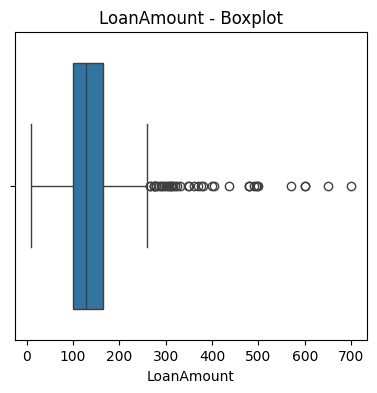

In [82]:
Q1 = df['LoanAmount'].quantile(0.25)
Q3 = df['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['LoanAmount'] < lower_bound) | (df['LoanAmount'] > upper_bound)]['LoanAmount']
# 1. Vizual analiz: Boxplot orqali outlierlarni ko'rish
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['LoanAmount'])
plt.title('LoanAmount - Boxplot')

Q1: 100.25, Q3: 164.75, IQR: 64.5
Tozalangan data shakli: (573, 13)


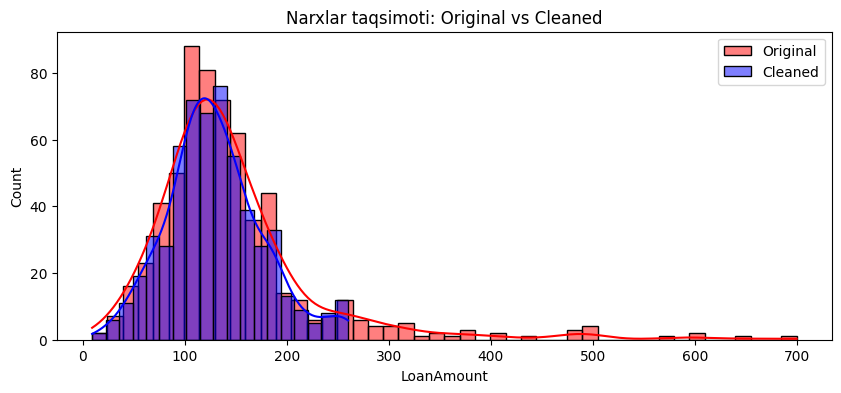

In [63]:

df_cleaned = df[(df['LoanAmount'] >= lower_bound) & (df['LoanAmount'] <= upper_bound)]
print(f"Tozalangan data shakli: {df_cleaned.shape}")

# 4. Qiyoslash
plt.figure(figsize=(10, 4))
sns.histplot(df['LoanAmount'], color='red', label='Original', kde=True)
sns.histplot(df_cleaned['LoanAmount'], color='blue', label='Cleaned', kde=True)
plt.legend()
plt.title("Narxlar taqsimoti: Original vs Cleaned")
plt.show()


In [64]:
df = df.drop('Loan_ID', axis=1)

Select Coulm: Loan_Status


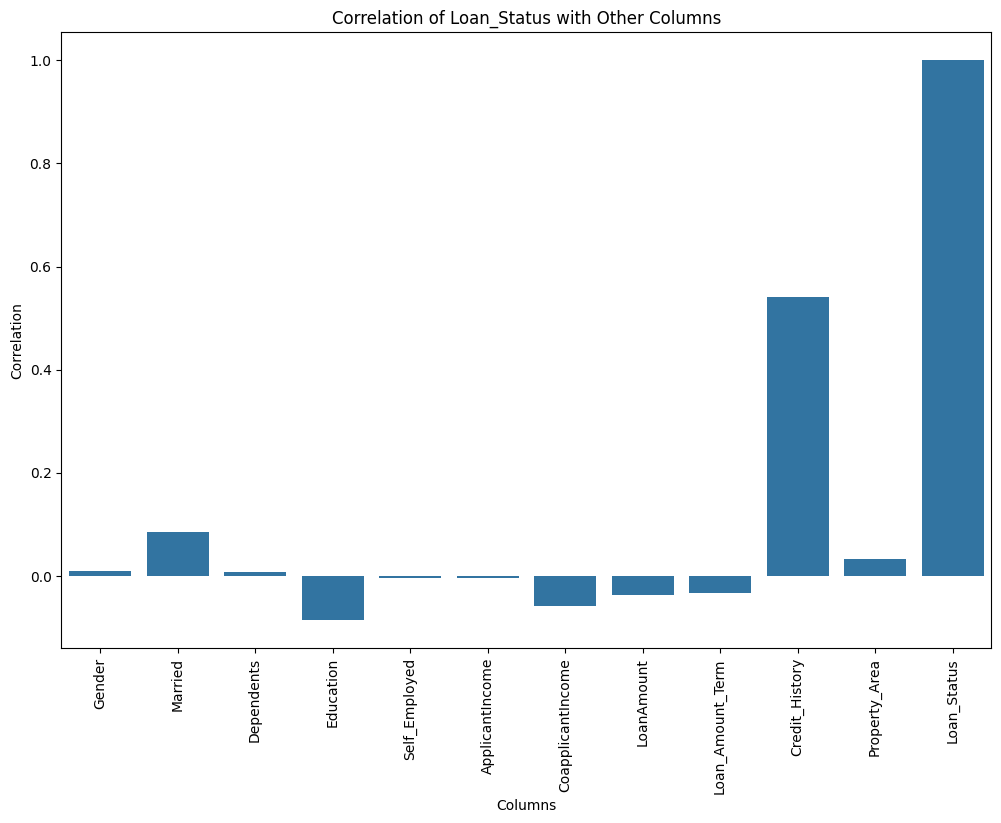

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


coulm=input('Select Coulm: ')
selected_column = f'{coulm}'


correlations = df.corrwith(df[selected_column])


plt.figure(figsize=(12, 8))
sns.barplot(x=correlations.index, y=correlations.values)
plt.title(f'Correlation of {selected_column} with Other Columns')
plt.xlabel('Columns')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.show()